In [176]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronavirus/Data/valid/pos/patient18907_study7_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient14963_study2_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient22974_study2_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient15320_study1_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient13723_study5_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient16839_study2_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient19846_study17_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient18907_study9_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient19286_study4_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient16619_study10_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient12203_study5_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient18975_study2_view1_frontal.jpg
/kaggle/input/coronavirus/Data/valid/pos/patient16

/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient02718_study7_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient05027_study1_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient07397_study9_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient00584_study5_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient05591_study3_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient00178_study6_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient04294_study1_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient00825_study2_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient01094_study8_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient04601_study7_view1_frontal.jpg
/kaggle/input/pneumoniadataset/Pnuemonia/Negative/patient00178_study5_view1_frontal.jpg
/kaggle/input/pneumoniadataset/P

In [177]:
import cv2 
import torch 

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [179]:
use_cuda = torch.cuda.is_available()

In [180]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture 
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
                
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)  
        self.batch1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)  
        self.batch2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)     
        self.pool3 = nn.MaxPool2d(2, 2)
        self.batch3 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(28*28*256, 512)
        self.batch_final = nn.BatchNorm1d(512)
        self.dropout = nn.Dropout(0.25) 
        self.fc2 = nn.Linear(512, 2) 
        
    def forward(self, x):
                
        x = self.pool1(self.batch1(F.relu(self.conv1(x))))               
        x = self.pool2(self.batch2(F.relu(self.conv2(x))))                      
        x = self.pool3(self.batch3(F.relu(self.conv3(x))))                
                      
        x = x.view(-1, 28*28*256)
        
        x = self.batch_final(F.relu(self.fc1(x)))        
        x = self.dropout(x)        
        x = F.relu(self.fc2(x))
               
        return x
    

model = Net()
# move tensors to GPU if CUDA is available
if use_cuda:
    model.cuda()
    
print(model)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=200704, out_features=512, bias=True)
  (batch_final): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_

In [181]:
from torchvision import datasets
import torchvision.transforms as transforms

batch_size = 10
num_workers = 0

data_dir = '/kaggle/input/coronavirus/Data/'

train_path = data_dir + 'train'
val_path = data_dir + 'valid'
test_path = data_dir + 'test'

transforms_data = {     
    
    'train' : transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(10),
                transforms.ToTensor(), 
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])]),
    
    'test/valid' : transforms.Compose([
                    transforms.Resize(size=(224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])])
                  }

train_dataset = datasets.ImageFolder(train_path, transforms_data['train'])
val_dataset = datasets.ImageFolder(val_path, transforms_data['test/valid'])
test_dataset = datasets.ImageFolder(test_path, transforms_data['test/valid'])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= batch_size, num_workers = num_workers, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size= batch_size, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= batch_size, num_workers = num_workers)

loaders = {
    'train': train_loader,
    'valid': val_loader,
    'test': test_loader
}

In [182]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum = 0.95)

In [183]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))  
        # validate the model
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        # Save model if validation loss decreases 
        if valid_loss < valid_loss_min:
            print('Validation loss decreased from ({:.7f} to {:.7f}). Saving the model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss      
    # return trained model
    return model


# train the model
model = train(50, loaders_scratch, model, optimizer, 
                      criterion, use_cuda, 'model.pt')

# load the model that got the best validation accuracy
model.load_state_dict(torch.load('model.pt'))

Epoch: 1 	Training Loss: 0.766296 	Validation Loss: 0.724120
Validation loss decreased from (inf to 0.7241203). Saving the model...
Epoch: 2 	Training Loss: 0.721058 	Validation Loss: 0.869677
Epoch: 3 	Training Loss: 0.707919 	Validation Loss: 0.791120
Epoch: 4 	Training Loss: 0.700498 	Validation Loss: 0.708584
Validation loss decreased from (0.7241203 to 0.7085842). Saving the model...
Epoch: 5 	Training Loss: 0.685609 	Validation Loss: 0.795474
Epoch: 6 	Training Loss: 0.689564 	Validation Loss: 0.691265
Validation loss decreased from (0.7085842 to 0.6912647). Saving the model...
Epoch: 7 	Training Loss: 0.717194 	Validation Loss: 0.717806
Epoch: 8 	Training Loss: 0.758317 	Validation Loss: 0.724944
Epoch: 9 	Training Loss: 0.747477 	Validation Loss: 0.711500
Epoch: 10 	Training Loss: 0.728628 	Validation Loss: 0.703147
Epoch: 11 	Training Loss: 0.642925 	Validation Loss: 0.692317
Epoch: 12 	Training Loss: 0.604142 	Validation Loss: 0.817646
Epoch: 13 	Training Loss: 0.682434 	Vali

<All keys matched successfully>

In [184]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model, criterion, use_cuda)

Test Loss: 0.686819


Test Accuracy: 44% (158/357)


In [185]:
from PIL import Image
import matplotlib.pyplot as plt 

In [201]:
def predict(img_path):
    # load the image and return the predicted breed45434wd2fq
    b_image = Image.open(img_path)
    mode = b_image.mode
    if (mode == 'L'):
        rgbimg = Image.new("RGB", b_image.size)
        rgbimg.paste(b_image)
        b_image = rgbimg
    image_transform = transforms.Compose([transforms.Resize(size = (224, 224)),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])])
    b_image = image_transform(b_image)
    model.eval()
    pred = model(b_image.unsqueeze_(0).to('cuda')).cpu().detach().numpy().argmax()
    if pred == 0:
        return "Negative"
    if pred == 1:
        return "Positive"

In [202]:
def final_run(img_path):
    print(predict(img_path))
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

Negative


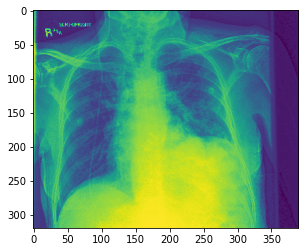

In [204]:
pos_test = []
neg_test = []
for dirname, _, filenames in os.walk('/kaggle/input/coronavirus/test/pos'):
    for filename in filenames:
        pos_test.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/coronavirus/test/pos'):
    for filename in filenames:
        pos_test.append(os.path.join(dirname, filename)) 